In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('matrix_mult_results_fopenmp.csv')


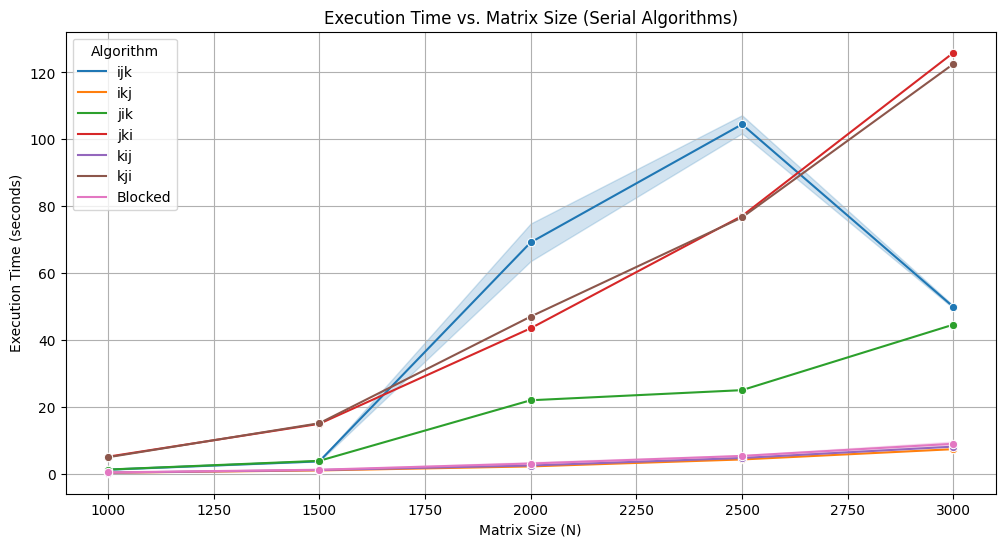

In [ ]:
serial_data = data[data['Version'] == 'Serial']
parallel_data = data[data['Version'] == 'Parallel']

plt.figure(figsize=(12, 6))
sns.lineplot(data=serial_data, x='N', y='Time(s)', hue='Algorithm', marker='o')
plt.title('Execution Time vs. Matrix Size (Serial Algorithms)')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()


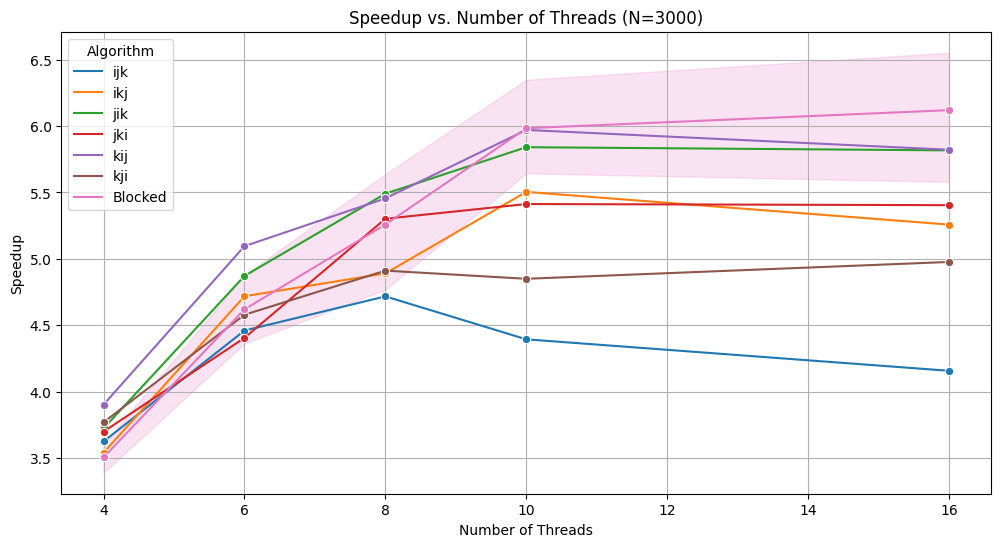

In [ ]:
N_value = 3000
subset = data[(data['N'] == N_value) & (data['Version'] == 'Parallel')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Threads', y='Speedup', hue='Algorithm', marker='o')
plt.title(f'Speedup vs. Number of Threads (N={N_value})')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()


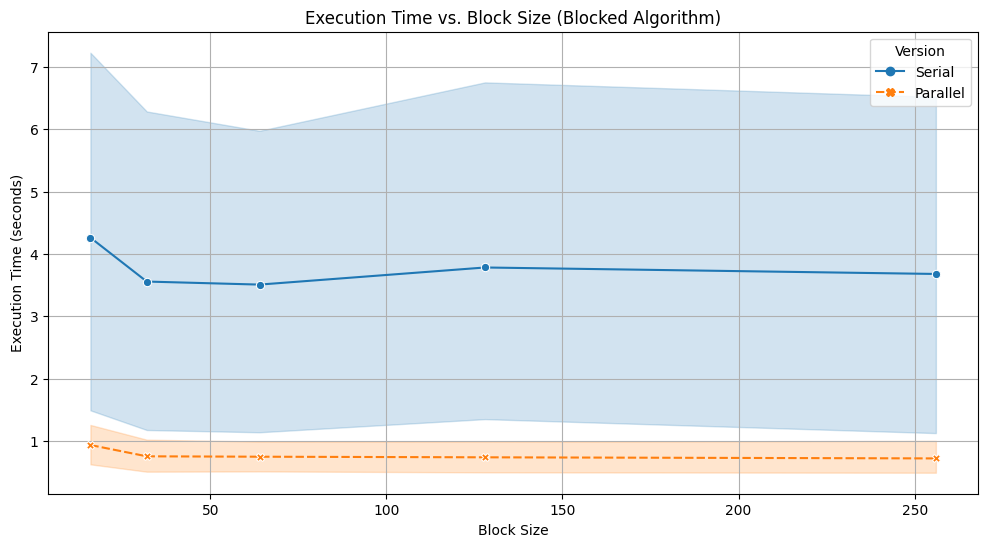

In [ ]:
blocked_data = data[data['Algorithm'] == 'Blocked']

plt.figure(figsize=(12, 6))
sns.lineplot(data=blocked_data, x='BlockSize', y='Time(s)', hue='Version', style='Version', markers=True)
plt.title('Execution Time vs. Block Size (Blocked Algorithm)')
plt.xlabel('Block Size')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Version')
plt.grid(True)
plt.show()


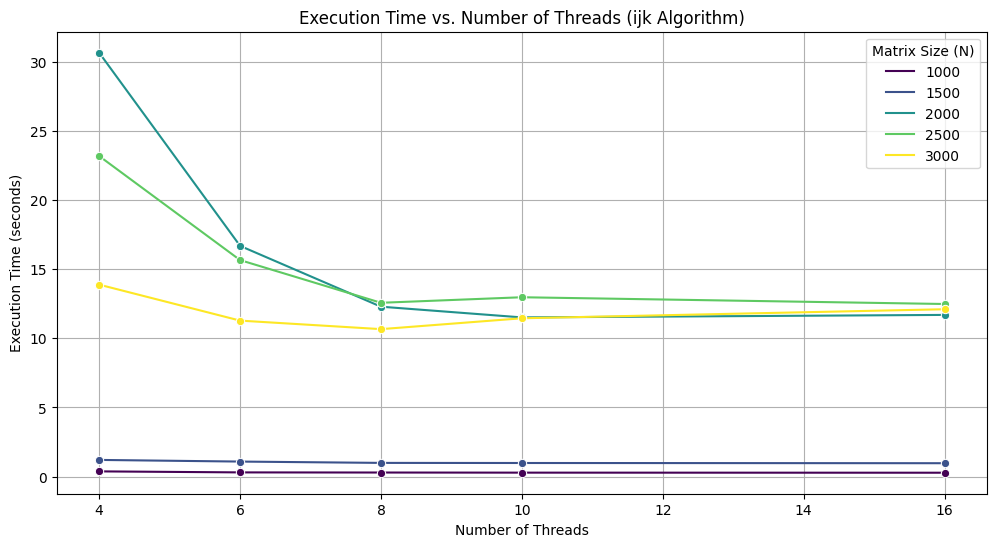

In [ ]:
algorithm = 'ijk'
subset = data[(data['Algorithm'] == algorithm) & (data['Version'] == 'Parallel')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Threads', y='Time(s)', hue='N', marker='o', palette='viridis')
plt.title(f'Execution Time vs. Number of Threads ({algorithm} Algorithm)')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Matrix Size (N)')
plt.grid(True)
plt.show()


/var/folders/dv/_q1pjhy55snfzlmzvmv7p1_h0000gn/T/ipykernel_75521/3229487822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parallel_data['Efficiency'] = parallel_data['Speedup'] / parallel_data['Threads']


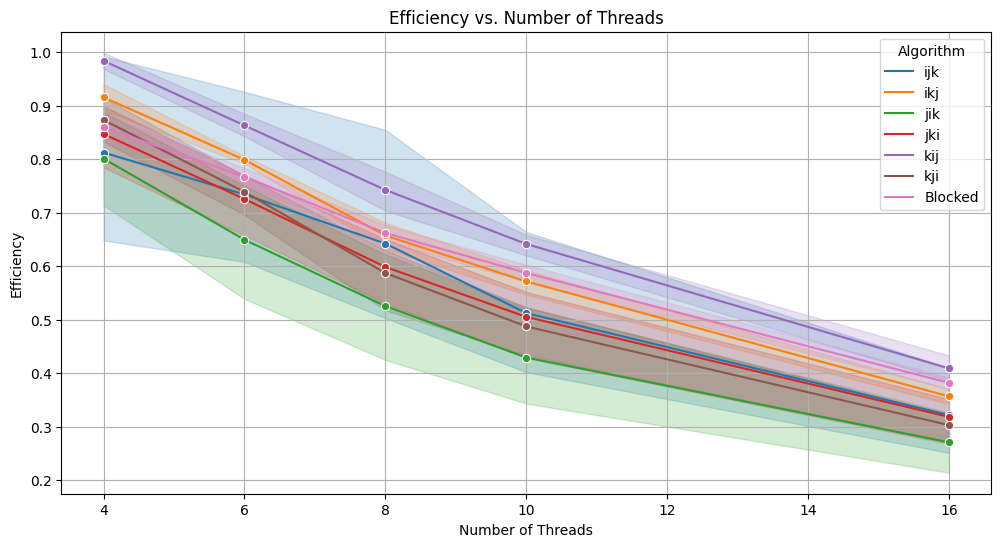

In [ ]:
parallel_data['Efficiency'] = parallel_data['Speedup'] / parallel_data['Threads']

plt.figure(figsize=(12, 6))
sns.lineplot(data=parallel_data, x='Threads', y='Efficiency', hue='Algorithm', marker='o')
plt.title('Efficiency vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()


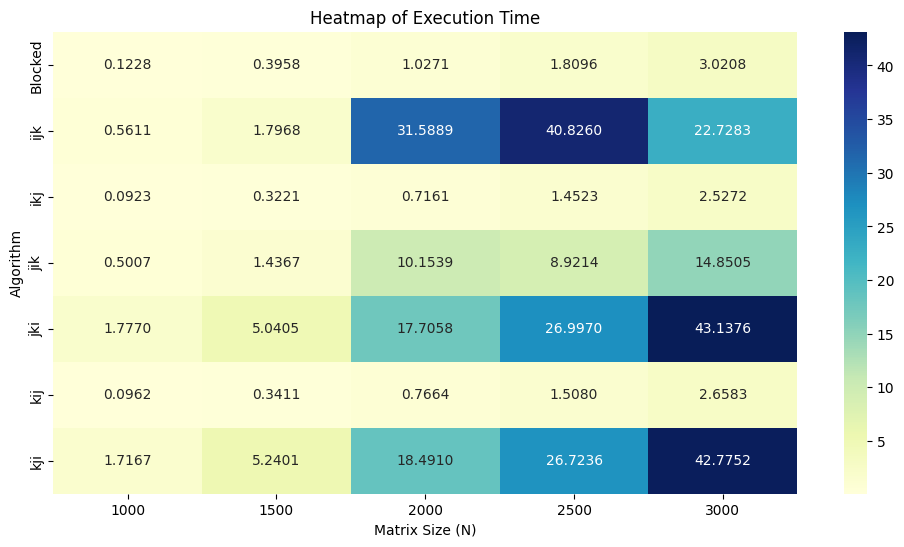

In [ ]:
pivot_table = data.pivot_table(values='Time(s)', index='Algorithm', columns='N', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Heatmap of Execution Time')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Algorithm')
plt.show()


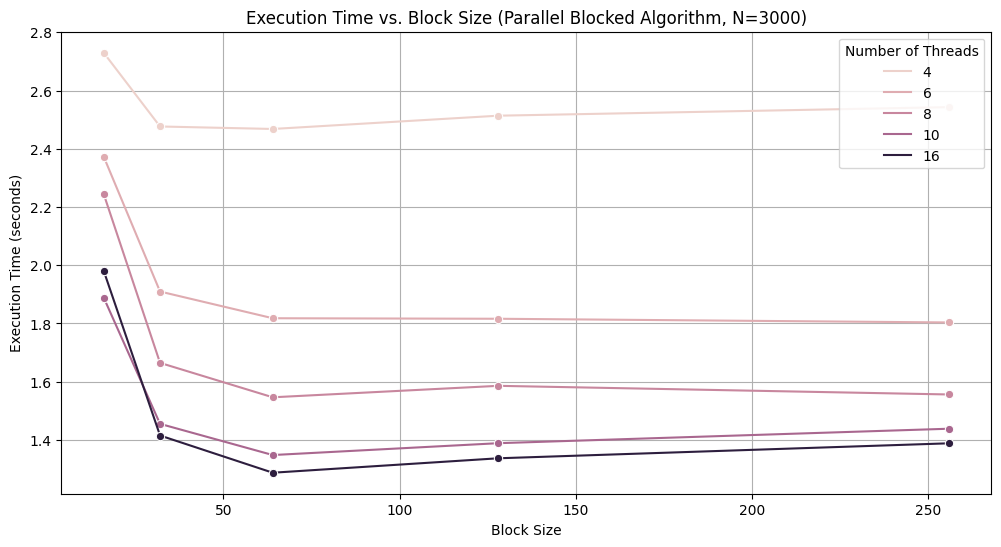

In [ ]:
N_value = 3000
blocked_parallel = blocked_data[(blocked_data['N'] == N_value) & (blocked_data['Version'] == 'Parallel')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=blocked_parallel, x='BlockSize', y='Time(s)', hue='Threads', marker='o')
plt.title(f'Execution Time vs. Block Size (Parallel Blocked Algorithm, N={N_value})')
plt.xlabel('Block Size')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Number of Threads')
plt.grid(True)
plt.show()
